In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 5x6 pixel representation flattened into 30-length arrays
A = np.array([
    [0,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,1,0],
    [1,0,0,0,1,0],
    [1,0,0,0,1,0]
]).flatten()

B = np.array([
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,1,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,1,0]
]).flatten()


In [3]:
# Features (inputs)
X = np.array([A, B, C])

# One-hot encoded labels (targets)
Y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # derivative assumes input already passed through sigmoid

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(predictions, targets):
    return -np.mean(np.sum(targets * np.log(predictions + 1e-9), axis=1))


In [5]:
np.random.seed(42)

input_size = 30     # 5x6 image
hidden_size = 16    # you can tune this
output_size = 3     # 3 classes: A, B, C
learning_rate = 0.1
epochs = 5000

# Weight initialization
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [6]:
losses = []
accuracies = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)  # predictions
    
    # Loss computation
    loss = cross_entropy(a2, Y)
    losses.append(loss)
    
    # Accuracy
    predictions = np.argmax(a2, axis=1)
    targets = np.argmax(Y, axis=1)
    accuracy = np.mean(predictions == targets)
    accuracies.append(accuracy)
    
    # Backpropagation
    dz2 = a2 - Y
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    # Gradient descent update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.2f}")


Epoch 0: Loss = 3.5842, Accuracy = 0.33
Epoch 500: Loss = 0.0053, Accuracy = 1.00
Epoch 1000: Loss = 0.0025, Accuracy = 1.00
Epoch 1500: Loss = 0.0016, Accuracy = 1.00
Epoch 2000: Loss = 0.0012, Accuracy = 1.00
Epoch 2500: Loss = 0.0009, Accuracy = 1.00
Epoch 3000: Loss = 0.0008, Accuracy = 1.00
Epoch 3500: Loss = 0.0007, Accuracy = 1.00
Epoch 4000: Loss = 0.0006, Accuracy = 1.00
Epoch 4500: Loss = 0.0005, Accuracy = 1.00


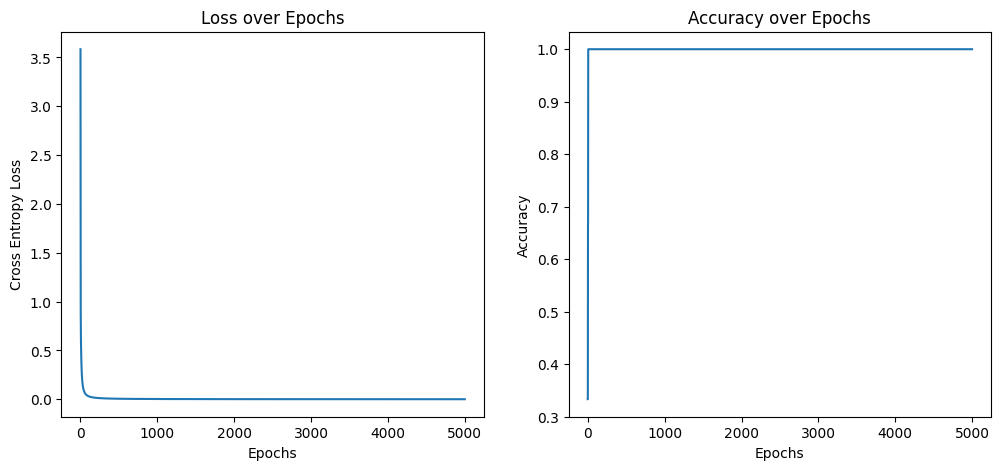

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()


Predicted Letter: A (Expected: A)


Predicted Letter: B (Expected: B)


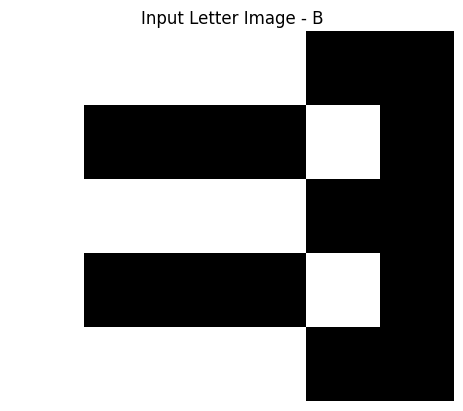

Predicted Letter: C (Expected: C)


In [8]:
def predict_letter(image, label_name):
    z1 = np.dot(image, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    prediction = np.argmax(a2)
    print(f"Predicted Letter: {['A', 'B', 'C'][prediction]} (Expected: {label_name})")
    plt.imshow(image.reshape(5, 6), cmap='gray')
    plt.title(f"Input Letter Image - {label_name}")
    plt.axis('off')
    plt.show()

# Test predictions
predict_letter(A, "A")
predict_letter(B, "B")
predict_letter(C, "C")


Predicted Letter: B


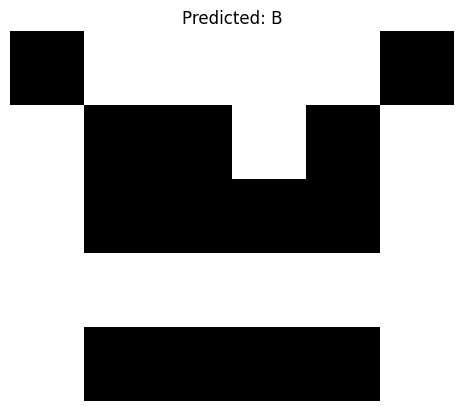

In [9]:
# New custom test image (noisy A)
test_image = np.array([
    0,1,1,1,1,0,
    1,0,0,1,0,1,
    1,0,0,0,0,1,
    1,1,1,1,1,1,
    1,0,0,0,0,1
])

# Reshape and predict
output = softmax(np.dot(sigmoid(np.dot(test_image.reshape(1, -1), W1) + b1), W2) + b2)
prediction = np.argmax(output)

# Print prediction
print("Predicted Letter:", ["A", "B", "C"][prediction])

# Show the input image
plt.imshow(test_image.reshape(5, 6), cmap="gray")
plt.title(f"Predicted: {['A', 'B', 'C'][prediction]}")
plt.axis("off")
plt.show()
